# LAB3: PCA + conjunto de dados MNIST

<hr style="border:1px  solid black"> </hr>

## Nome: Eduardo Marques
## Número: 45977

<hr style="border:1px  solid black"> </hr>

## Desenvolva e corra o código pedido nas células imediatamente abaixo das perguntas.

# IMPORTANTE:
## Uma vez completado, grave este Jupyter notebook com o seguinte nome:
## Axxxxx-Lab3.ipynb (Axxxxx: número de aluno)
##  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.

<hr style="border:2px solid black"> </hr>

# Conjunto de dados $\texttt{MNISTsmall.p}$:

# Pergunta 1: Considere os dígitos "3", "8" e "9"  dos dados (3000 dígitos de treino e 1500 de teste).
## a) Calcule a matriz de PCA para os 3000 dígitos de treino. Use um número de componentes principais de modo aos dados projetados terem $95\%$ da variância total dos dados originais. Especifique (imprima) qual o número de componentes obtidas. 
## b) Visualize em forma de imagem, as três primeiras componetes principais (3 imagens de $28\times28$).
## c) Aplique a transformação PCA ao primeiro dígito "3" e ao primeiro dígito "8" do conjunto de teste. Visualize em forma de imagem os dígitos originais e os dígitos reconstruídos após a transformação PCA inversa.


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import pickle

fName = 'MNISTsmall.p'
D = pickle.load(open(fName, 'rb'))

X = D['X']
y = D['trueClass']
f1 = D['foldTrain']
f2 = D['foldTest']

X1 = X[:,f1]
y1 = y[f1]
X2 = X[:,f2]
y2 = y[f2]

X1a = X1[:,y1==3]
X1b = X1[:,y1==8]
X1c = X1[:,y1==9]

X11 = np.hstack((X1a, X1b, X1c))

X2a = X2[:,y2==3]
X2b = X2[:,y2==8]
X2c = X2[:,y2==9]

X22 = np.hstack((X2a, X2b, X2c))

print(X11.shape)
print(X22.shape)

(784, 3000)
(784, 1500)


# a)

Número de componentes obtidos: 139


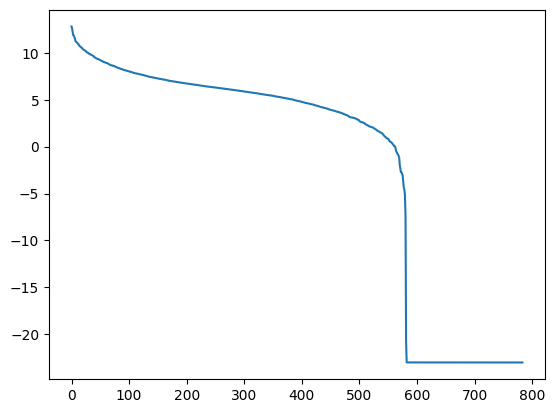

In [35]:
Cx = np.cov(X11)
u, W = la.eig(Cx)
u = u.real
W = W.real

idx = np.argsort(-u)
u = u[idx]
W = W[:,idx]
plt.plot(np.log(u+1e-10)) 

un = u/np.sum(u)
L = np.cumsum(un)
print("Número de componentes obtidos:", np.sum(L<=0.95))

# b)

(-0.5, 27.5, 27.5, -0.5)

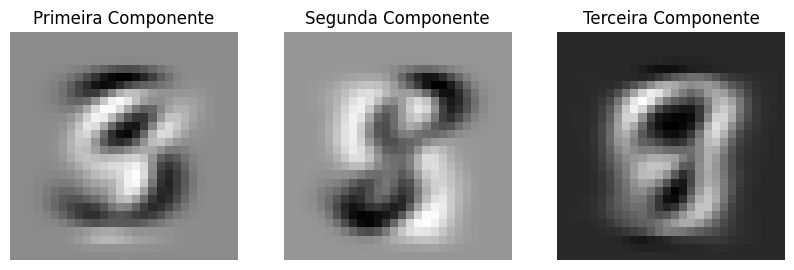

In [36]:
W0 = W[:,0].reshape((28,28))
W0 = W0-W0.min()
W0 = W0/W0.max()*255
plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(W0, cmap='binary')
plt.title('Primeira Componente')
plt.axis('off')

W1 = W[:,1].reshape((28,28))
W1 = W1-W1.min()
W1 = W1/W1.max()*255
plt.subplot(132)
plt.imshow(W1, cmap='binary')
plt.title('Segunda Componente')
plt.axis('off')

W2 = W[:,2].reshape((28,28))
W2 = W2-W2.min()
W2 = W2/W2.max()*255
plt.subplot(133)
plt.imshow(W2, cmap='binary')
plt.title('Terceira Componente')
plt.axis('off')



# c)

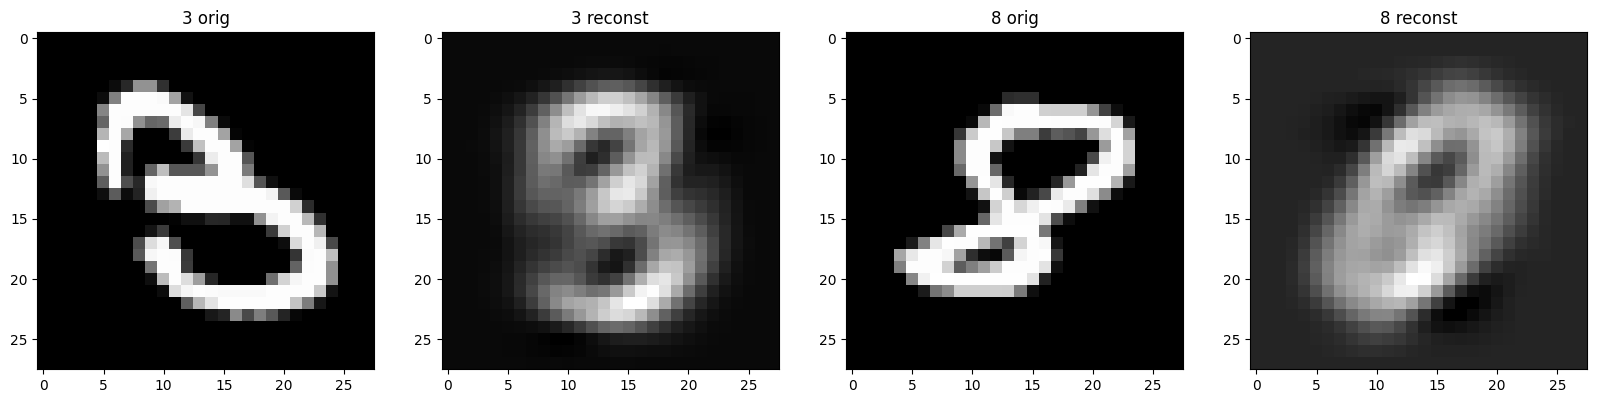

In [37]:
from sklearn.decomposition import PCA

X2_3 = np.where(y2 == 3)[0]
X2_8 = np.where(y2 == 8)[0]

first3 = X2_3[0]
first8 = X2_8[0]

f3 = X2[:, first3].reshape(28, 28)
f8 = X2[:, first8].reshape(28, 28)

pca = PCA(n_components=3)
X_train = X1.T
pca.fit(X_train)


r3 = pca.inverse_transform(pca.transform(f3.reshape(1, -1))).reshape(28, 28)
r8 = pca.inverse_transform(pca.transform(f8.reshape(1, -1))).reshape(28, 28)

plt.figure(figsize=(20, 20))

plt.subplot(341)
plt.imshow(f3, cmap='gray')
plt.title('3 orig')

plt.subplot(342)
plt.imshow(r3, cmap='gray')
plt.title('3 reconst')

plt.subplot(343)
plt.imshow(f8, cmap='gray')
plt.title('8 orig')

plt.subplot(344)
plt.imshow(r8, cmap='gray')
plt.title('8 reconst')

plt.show()

# Pergunta 2: Considere todos os dados
## a) Estime a transformação PCA com os dados de treino, de modo aos dados projetados terem $75\%$ da variância total dos dados e aplique a transformação aos dados de treino e teste. 
## b) Treine o classificador $\texttt{SVC(kernel='rbf')}$ com os dados de treino transformados, e calcule a matriz de confusão e o número total de erros nos dados de teste transformados.
## c) Estime a transformação PCA com os dados de treino, de modo aos dados projetados terem $75\%$ da variância total dos dados e os dados transformardos terem média nula e variância unitária em cada dimensão. Aplique a transformação aos dados de treino e teste. 
## d) Treine o classificador $\texttt{SVC(kernel='rbf')}$ com os dados transformados da alínea anterior, e calcule a matriz de confusão e o número total de erros nos dados de teste.

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
svm=SVC(kernel='rbf')

fName = 'MNISTsmall.p'
D = pickle.load(open(fName, 'rb'))

X = D['X']
y = D['trueClass']
f1 = D['foldTrain']
f2 = D['foldTest']

X1 = X[:,f1]
y1 = y[f1]
X2 = X[:,f2]
y2 = y[f2]

# a)

In [39]:
pca = PCA(n_components = .75).fit(X1.T) 
    
# Obter a tranformação PCA dos dados de treino e teste
X1p = pca.transform(X1.T)
X2p = pca.transform(X2.T)

print('Shape dos Dados de Treino Transformados com PCA: ', X1p.shape)
print('Shape dos Dados de  Teste Transformados com PCA: ', X2p.shape)

Shape dos Dados de Treino Transformados com PCA:  (10000, 33)
Shape dos Dados de  Teste Transformados com PCA:  (5000, 33)


# b)

In [40]:
svm.fit(X1p, y1) # Já está transposto
y2e = svm.predict(X2p) 
print('Matriz de Confusão: \n', confusion_matrix(y2, y2e))
print('Número Total de Erros: ', np.sum(y2 != y2e))

Matriz de Confusão: 
 [[493   0   2   0   0   2   2   0   1   0]
 [  0 492   3   2   0   1   1   1   0   0]
 [  3   0 475   4   1   1   5   8   3   0]
 [  0   0   2 475   0  10   1   8   3   1]
 [  1   0   1   0 478   0   4   0   0  16]
 [  1   0   0   9   2 480   4   1   2   1]
 [  7   3   0   0   3   1 483   0   3   0]
 [  0  10  16   3   5   0   0 456   1   9]
 [  5   0   1  10   3   2   0   3 474   2]
 [  4   6   1   6  13   3   0   5   6 456]]
Número Total de Erros:  238


# c)

In [41]:
import sklearn.preprocessing as pp

pca = PCA(n_components=0.75)
scaler = pp.StandardScaler()

X1p = pca.fit_transform(X1.T)
X1p_s = scaler.fit_transform(X1p)

X2p = pca.transform(X2.T)
X2p_s = scaler.transform(X2p)

# d)


In [42]:
svm.fit(X1p_s, y1) # Já está transposto
y2e = svm.predict(X2p_s) 
print('Matriz de Confusão: \n', confusion_matrix(y2, y2e))
print('Número Total de Erros: ', np.sum(y2 != y2e))

Matriz de Confusão: 
 [[494   0   0   0   0   1   4   0   1   0]
 [  0 492   4   2   0   1   0   1   0   0]
 [  1   1 473   5   3   0   3   8   5   1]
 [  0   0   3 475   0   9   2   7   3   1]
 [  1   0   1   0 480   0   4   0   1  13]
 [  0   0   0   7   0 488   2   0   2   1]
 [  5   3   0   0   3   3 484   0   2   0]
 [  1   7  16   1   3   0   0 463   2   7]
 [  3   0   4   9   2   3   1   3 473   2]
 [  4   5   1   6  11   3   0   5   6 459]]
Número Total de Erros:  219
